Elijo año y creo la carpeta. Luna esto en Windowns no sé si anda. Usá os.path.join o borrá la linea que crea. 

In [1]:
year = 2009
path = f'../figs/positive_graphs/{year}'
import os
if not os.path.exists(path):
    os.makedirs(path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker
from new_disparity_filter import NewDisparityFilter

In [4]:
procesador = ProcesadorDeVotaciones(year, year, 'data')
congreso = procesador.procesar()
congreso.validate()

Loading from data/2009/1
Loading from data/2009/2
Loading from data/2009/3
Loading from data/2009/4
Loading from data/2009/5
Loading from data/2009/6
Loading from data/2009/7
Loading from data/2009/8
Loading from data/2009/9
Loading from data/2009/10
Loading from data/2009/11
Loading from data/2009/12


In [5]:
maker = HeavyGraphMaker(congreso)
grafo = maker.create_year_network(year, positive = True)

C:\Users\Luna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


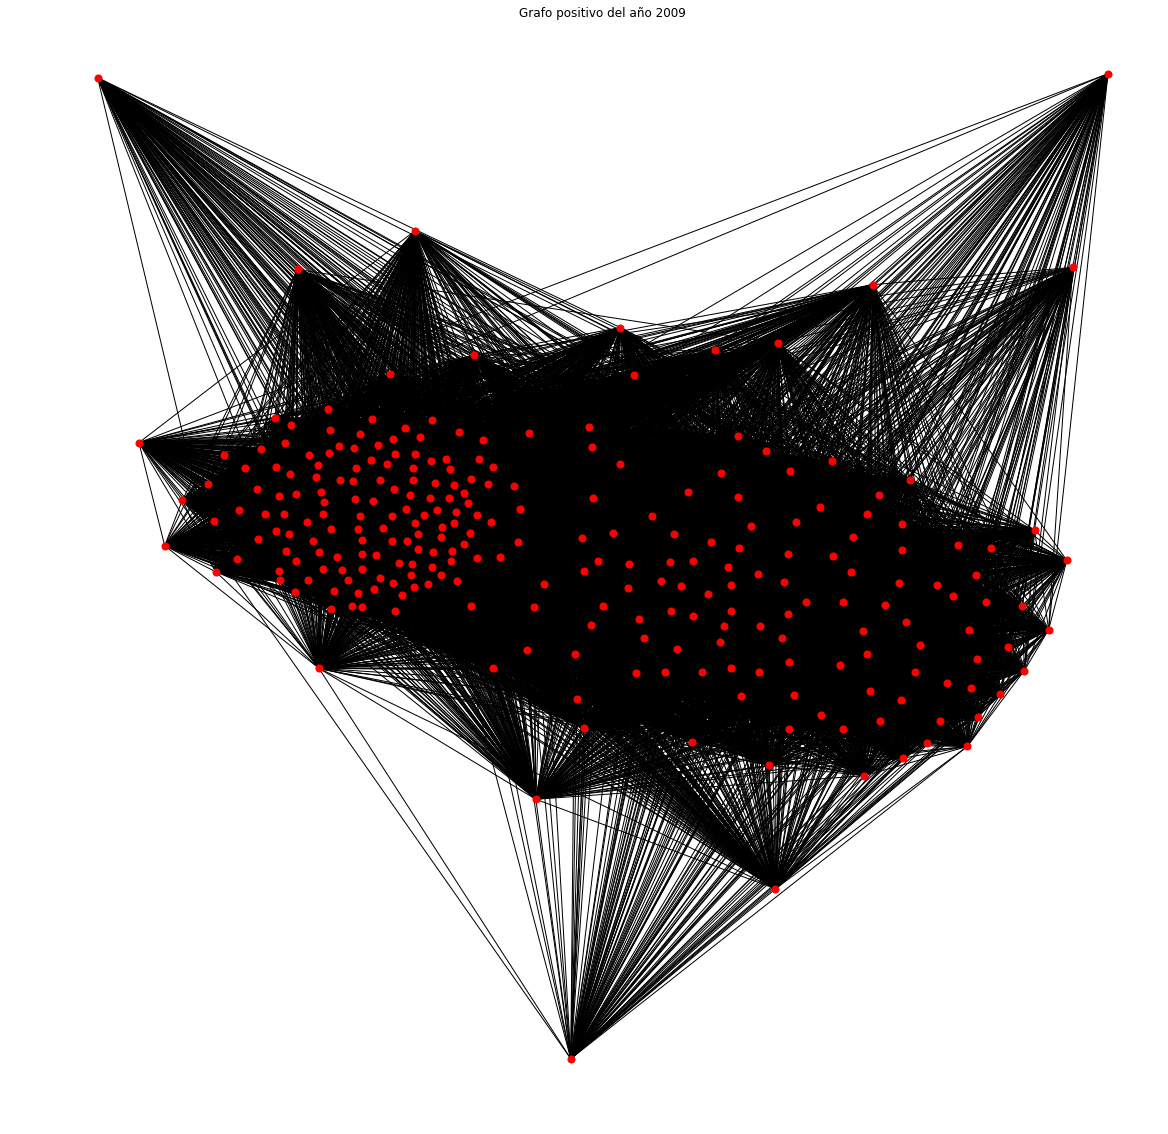

In [6]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo.get_nodes()
pos = nx.spring_layout(grafo.graph, k = 1)
ec = nx.draw_networkx_edges(grafo.graph, pos, alpha=1)
nc = nx.draw_networkx_nodes(grafo, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo positivo del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/{year}/grafo.jpg')
plt.show()

In [7]:
GC, _ = grafo.gigant_component()

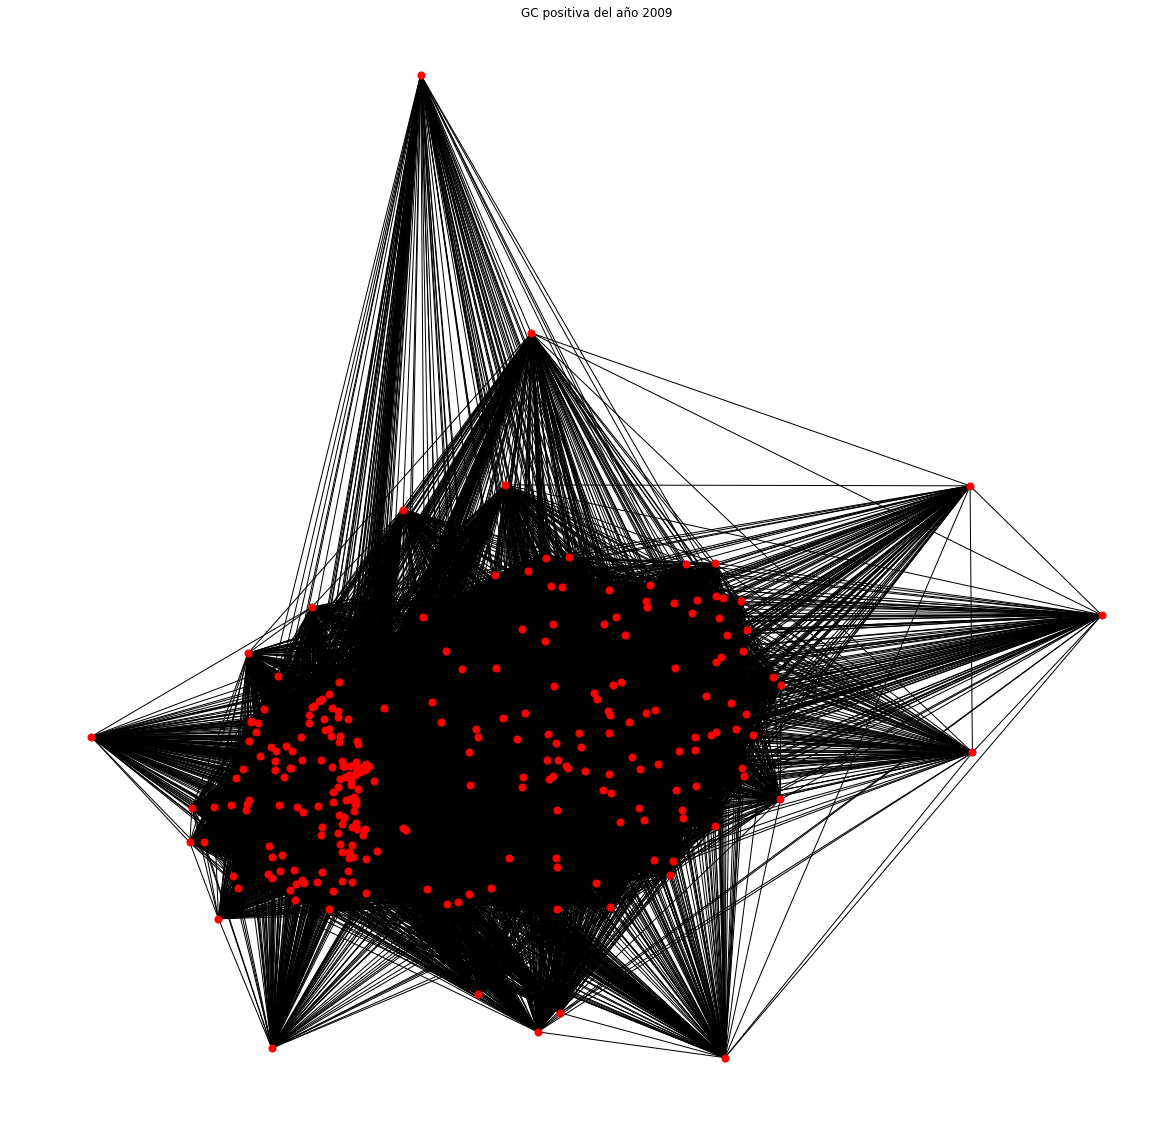

In [8]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC.nodes()
pos = nx.spring_layout(GC)
ec = nx.draw_networkx_edges(GC, pos, alpha=1)
nc = nx.draw_networkx_nodes(GC, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'GC positiva del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/{year}/GC.jpg')
plt.show()

In [9]:
print(f' El grafo tiene {len(grafo.get_edges())} enlaces')

 El grafo tiene 26699 enlaces


In [10]:
alpha = 0.04

In [11]:
copia = grafo.copy()
grafo_cortado = NewDisparityFilter(copia).alpha_cut(alpha_t = alpha)

The graph has 26699 edges
Max alpha is 0.20310639281603707, min alpha is 0.006290054516902114
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
Enlaces sacados: 21000
Enlaces sacados: 22000
Enlaces sacados: 23000
23263 edges deleted, 3436 left
Gigant component is 0.9318181818181818 of the total


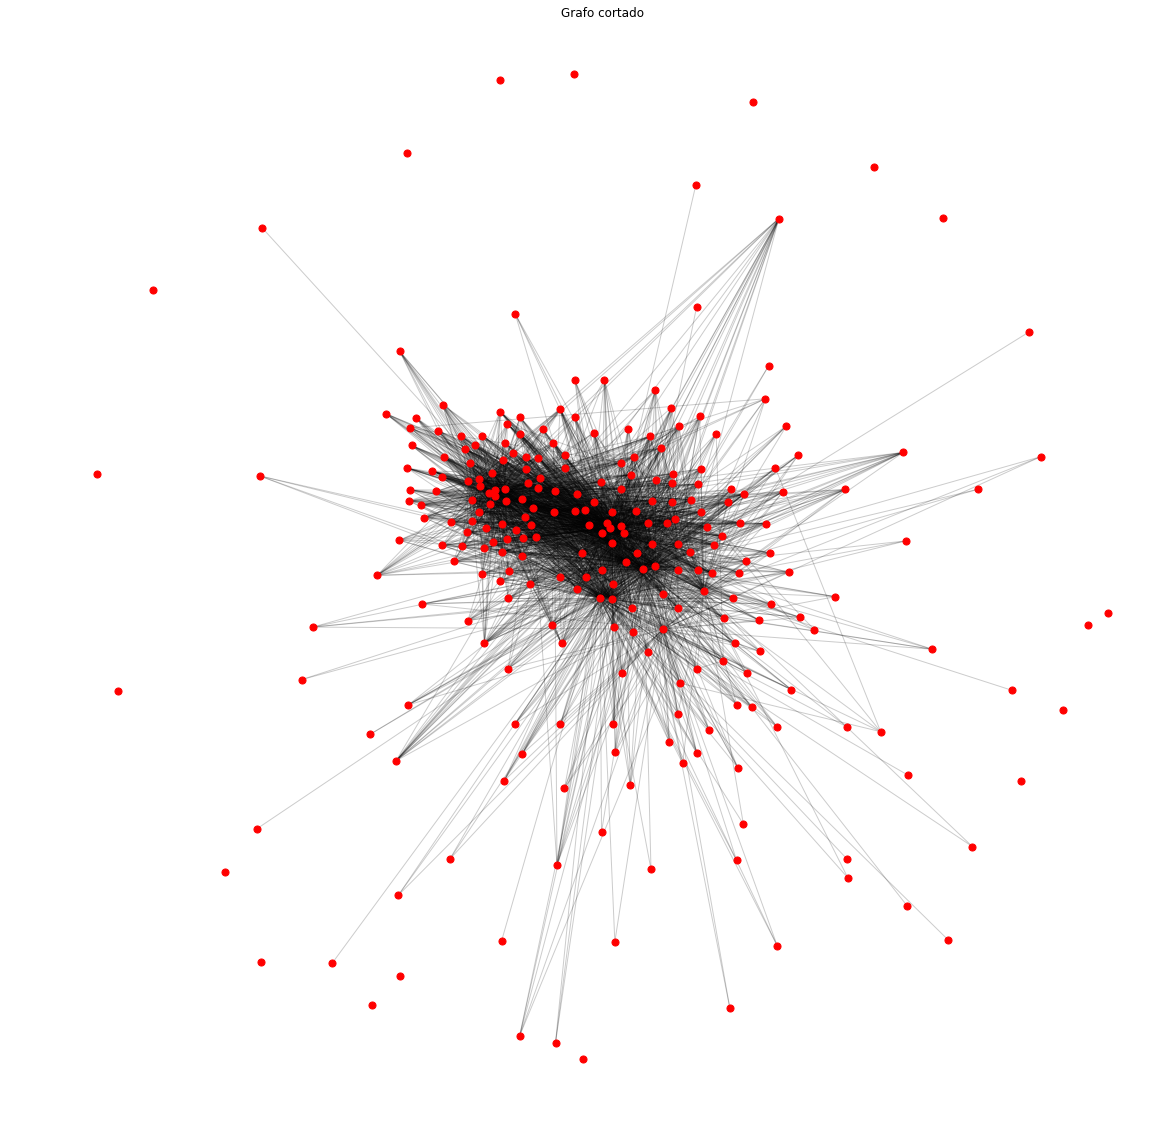

In [12]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado.get_nodes()
pos = nx.spring_layout(grafo_cortado.graph, k = 1)
ec = nx.draw_networkx_edges(grafo_cortado.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo cortado')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}/cortado_alpha_{alpha}.jpg')
plt.show()

In [77]:
GC_cut, _ = grafo_cortado.gigant_component()

C:\Users\Luna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


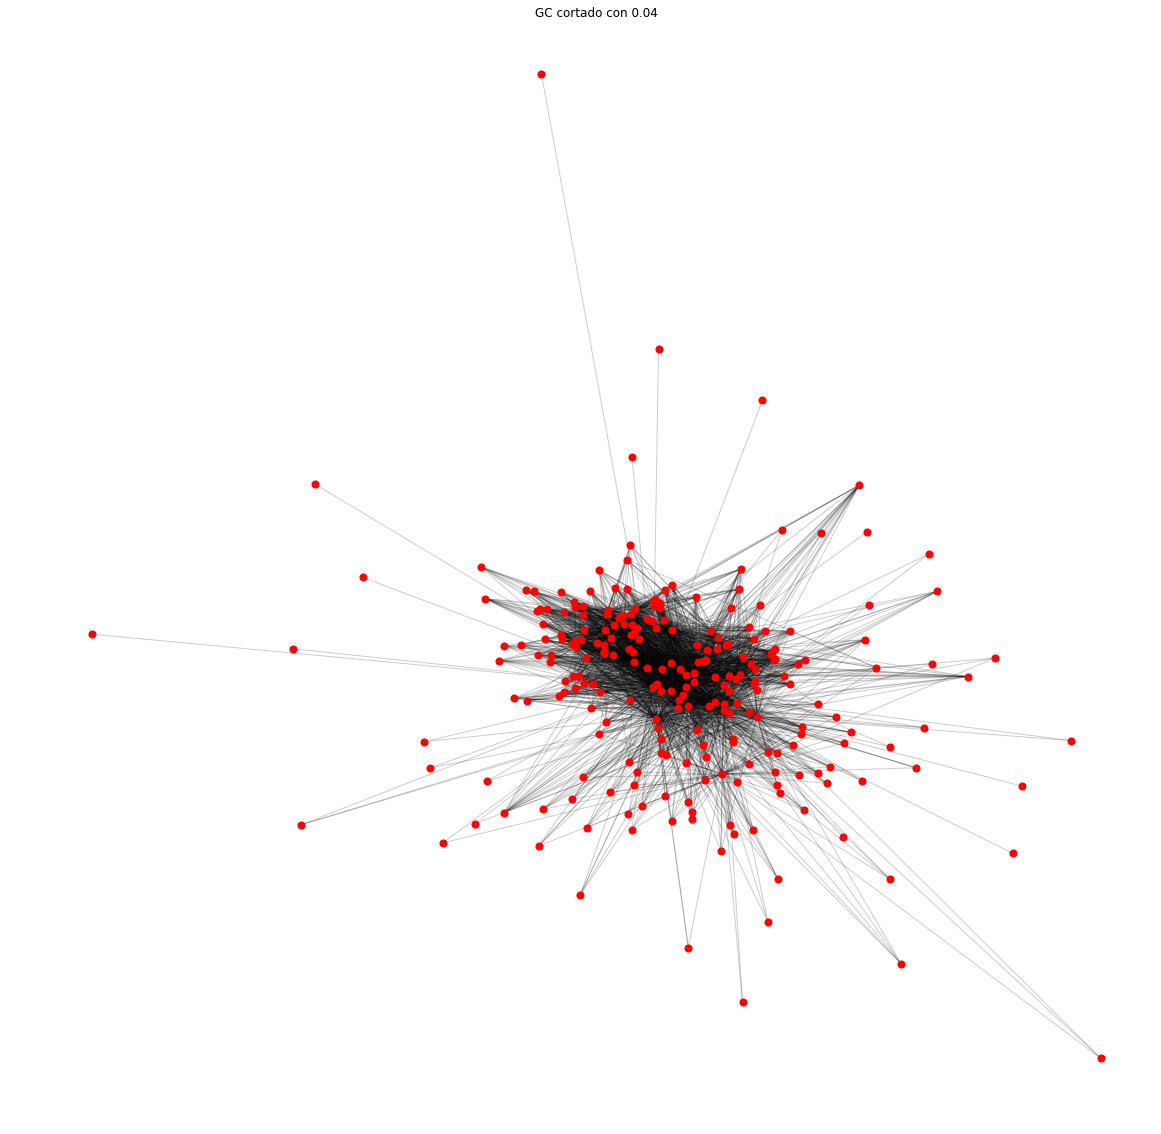

In [78]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC_cut.nodes()
pos = nx.spring_layout(GC_cut)
ec = nx.draw_networkx_edges(GC_cut, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(GC_cut, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'GC cortado con {alpha}')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}/GC_cortada_alpha_{alpha}.jpg')
plt.show()

In [79]:
new_weights = []
for e in GC_cut.edges():
    new_weights.append(GC_cut[e[0]][e[1]]['weight'])
print(min(new_weights), max(new_weights))

1 119


No handles with labels found to put in legend.


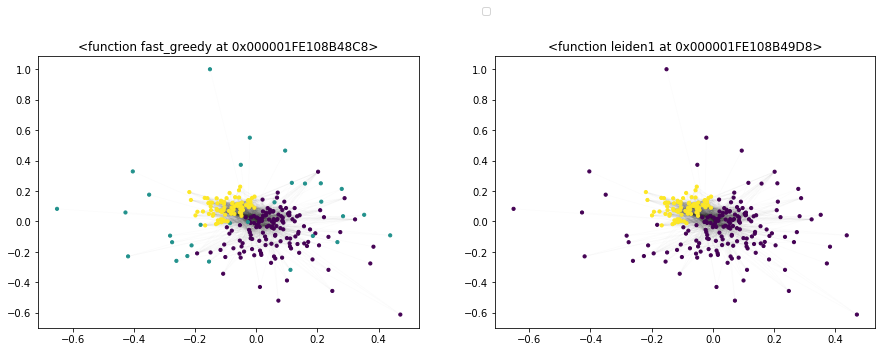

In [80]:
import funciones as f
array_funciones = [f.fast_greedy,f.leiden1]

fig, axs = plt.subplots(1,2, figsize=(15,5))
axs = axs.flatten()
#f. tight_layout(pad=3.0)

particiones = {}

for i,metodo in enumerate(array_funciones):
    particiones[metodo] = {}
    particion = metodo(GC_cut,new_weights)

    particiones[metodo] = particion
    colores = f.colores_hex(max(particion.values())+1) #funcion que devuelve n colores

    #nx.draw(Red_delfines, node_size= 100, ax = axs[i], node_color = node_color,pos=posiciones, node_shape = aShape,  nodelist = node_list)
    nx.draw_networkx_nodes(GC_cut, ax = axs[i],node_size=10, node_color=list(particion.values()),nodelist = list(particion.keys()),pos=pos)
    nx.draw_networkx_edges(GC_cut, ax = axs[i], width=1.0, alpha=0.01,pos=pos)
    axs[i].set_title(metodo)
plt.legend(bbox_to_anchor=(0, 1.2))
plt.show()

In [20]:
import yaml
#Red = open('red_cortada_2012-2019.txt').read()
#Red = yaml.load(Red)
file = open('ideologies.json').read()
file = yaml.load(file)
file

C:\Users\Luna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


{'2009': {'Justicialismo': ['Frente para la Victoria - PJ'],
  'Radiscalismo': ['Unión Cívica Radical',
   'Coalición Cívica - ARI - GEN - UPT'],
  'PRO': ['Propuesta Republicana'],
  'Socialismo': ['Partido Socialista']}}

In [50]:
dict_ideologies = {}
for ideology in file['2009']:
    dict_ideologies[ideology] = {}
    nodes = []
    for node in GC_cut.nodes():
        if list(node.parties[2009])[0].text in file['2009'][ideology]:
            nodes.append(node)
    dict_ideologies[ideology] = nodes


In [51]:
overlap_dict_nodos = {} 

In [52]:
#invierto el dict de particines de los algos asi tienen el mismo formato que los partidos
from collections import OrderedDict
dict_community= {}
for part in particiones:
    dict_community[part] = {}
    keys = list(OrderedDict.fromkeys(list(particiones[part].values())))
    values = []
    for key in keys:
        values.append([i for i,j in particiones[part].items() if j == key])
        
    dict_community[part]= {k: values[k] for k in keys}


In [71]:
def intersection(dict_comm,dict_ideo, dict_a_guardar):
    for algo_i in dict_comm: #recorro las particiones delos distintos algos
        dict_a_guardar[algo_i] = {}
        for particion in dict_comm[algo_i]:
            dict_a_guardar[algo_i]['part '+str(particion)] = {}
            a = set(dict_comm[algo_i][particion])
            #print(a)
            
            for partido in dict_ideo:
                interseccion = a.intersection(set(dict_ideo[partido]))
                dict_a_guardar[algo_i]['part '+str(particion)][partido] = {}
                dict_a_guardar[algo_i]['part '+str(particion)][partido] = len(interseccion) / len(a)
    return dict_a_guardar
                              

In [72]:
intersection(dict_community,dict_ideologies, overlap_dict_nodos)

{<function funciones.fast_greedy(Red_recableada, w)>: {'part 0': {'Justicialismo': 0.1323529411764706,
   'Radiscalismo': 0.3088235294117647,
   'PRO': 0.058823529411764705,
   'Socialismo': 0.07352941176470588},
  'part 1': {'Justicialismo': 0.6,
   'Radiscalismo': 0.03333333333333333,
   'PRO': 0.0,
   'Socialismo': 0.0},
  'part 2': {'Justicialismo': 0.775,
   'Radiscalismo': 0.0,
   'PRO': 0.0,
   'Socialismo': 0.0}},
 <function funciones.leiden1(red, w)>: {'part 0': {'Justicialismo': 0.21818181818181817,
   'Radiscalismo': 0.2606060606060606,
   'PRO': 0.048484848484848485,
   'Socialismo': 0.06060606060606061},
  'part 1': {'Justicialismo': 0.7654320987654321,
   'Radiscalismo': 0.0,
   'PRO': 0.0,
   'Socialismo': 0.0}}}

In [93]:
import pandas as pd
#fastgreedy algo
nodos_df = overlap_dict_nodos[list(overlap_dict_nodos.keys())[0]].copy() #no modificar data
df = pd.DataFrame(nodos_df).transpose()
df = df.astype(float).round(3)
df

,Justicialismo,PRO,Radiscalismo,Socialismo
part 0,0.132,0.059,0.309,0.074
part 1,0.600,0.000,0.033,0.000
part 2,0.775,0.000,0.000,0.000


In [76]:
#leiden algo
nodos_df = overlap_dict_nodos[list(overlap_dict_nodos.keys())[1]].copy() #no modificar data
df = pd.DataFrame(nodos_df).transpose()
df = df.astype(float).round(3)
df

,Justicialismo,PRO,Radiscalismo,Socialismo
part 0,0.218,0.048,0.261,0.061
part 1,0.765,0.000,0.000,0.000
